In [1]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns
train,test = pd.read_csv('Train.csv'),pd.read_csv('Test.csv')
sample_sub  = pd.read_csv('SampleSubmission.csv')

In [2]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [3]:
train.shape,test.shape

((7205, 9), (2061, 8))

In [4]:
train['Amount (Million Naira)'].fillna(train['Amount (Million Naira)'].median() , inplace = True)

y = train.pop('Amount (Million Naira)')

In [5]:
all = pd.concat([train,test], ignore_index = True)

all.Year = all.Year.str.replace(',','')
all.Year = all.Year.astype(float)
all.Distance  = all.Distance.str.replace(',','')
all.Distance = all.Distance.astype(float)


In [6]:
all.Type.fillna('Foreign Used', inplace=True)

In [7]:
all.Year.fillna(2011.0, inplace = True)
all.Year = all.Year.apply(int)

In [8]:
group = pd.DataFrame(all.groupby('Year')['Distance'].mean())
type(group)

pandas.core.frame.DataFrame

In [9]:
group = group.reset_index(level = 0)
group.head()

,Year,Distance
0,1979,NaN
1,1982,NaN
2,1986,100000.0
3,1989,NaN
4,1991,NaN


In [10]:
year  = list(group.Year)
distance = list(group.Distance)
print(year[:20])
print(distance[:20])

[1979, 1982, 1986, 1989, 1991, 1992, 1993, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]
[nan, nan, 100000.0, nan, nan, 175050.0, 110874.0, 253829.0, 234412.0, 164406.0, 196237.6, 210594.73333333334, 164894.33333333334, 211205.16326530612, 163510.14285714287, 180236.37209302327, 183420.56953642383, 159236.51184834124, 144341.046692607, 143493.8402366864]


In [11]:
def fill_distance(cols):
    yea = cols[0]
    dist = cols[1]
    if pd.isnull(dist):
        if yea in year:
            return distance[year.index(yea)]
    else:
        return dist
    


In [12]:
all['Distance'] = all[['Year', 'Distance']].apply(fill_distance, axis  = 1)

In [13]:
all.isna().sum()

VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Type         0
Distance     4
dtype: int64

In [14]:
all.Distance.fillna(all.Distance.mean(), inplace=True)

In [15]:
all.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,Nigerian Used,94903.339506
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,Nigerian Used,125000.000000
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,Foreign Used,110852.000000
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,Foreign Used,30000.000000
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,Nigerian Used,125206.000000


In [16]:
all.isna().sum()

VehicleID    0
Location     0
Maker        0
Model        0
Year         0
Colour       0
Type         0
Distance     0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [18]:
cat_cols = train.select_dtypes(include = 'object').columns
num_cols = train.select_dtypes(exclude = 'object').columns

In [19]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder , StandardScaler
from scipy import stats
from sklearn.preprocessing import power_transform


lb_Model  = LabelEncoder()
all.Model = lb_Model.fit_transform(all.Model)

lb_Colour = LabelEncoder()
all.Colour = lb_Colour.fit_transform(all.Colour)

lb_Maker = LabelEncoder()
all.Maker = lb_Maker.fit_transform(all.Maker)


In [20]:
all.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL12546,Abuja,17,142,2011,18,Nigerian Used,94903.339506
1,VHL18827,Ibadan,19,1204,2012,18,Nigerian Used,125000.000000
2,VHL19499,Lagos,29,1040,2010,17,Foreign Used,110852.000000
3,VHL17991,Abuja,34,590,2017,3,Foreign Used,30000.000000
4,VHL12170,Ibadan,53,659,2002,17,Nigerian Used,125206.000000


In [21]:
all = pd.get_dummies(all, columns = ['Location', 'Type'], prefix = '' , prefix_sep = '')

In [22]:
all.Year.nunique()

35

In [24]:

scaler = StandardScaler()
all['Scaled_Distance'] = scaler.fit_transform(all[['Distance']])
all['Log_Distance'] = np.log(all['Distance'])
all['box_cos_distance'] = power_transform(all[['Distance']], method = 'box-cox')

In [25]:

all.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,Scaled_Distance,Log_Distance,box_cos_distance
0,VHL12546,17,142,2011,18,94903.339506,1,0,0,0,0,1,-0.071802,11.460614,0.127860
1,VHL18827,19,1204,2012,18,125000.000000,0,1,0,0,0,1,0.260450,11.736069,0.529591
2,VHL19499,29,1040,2010,17,110852.000000,0,0,1,0,1,0,0.104263,11.615951,0.349130
3,VHL17991,34,590,2017,3,30000.000000,1,0,0,0,1,0,-0.788303,10.308953,-1.156289
4,VHL12170,53,659,2002,17,125206.000000,0,1,0,0,0,1,0.262724,11.737716,0.532124


In [26]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)



In [27]:
train, test  = all.iloc[:7205], all.iloc[7205:]

In [28]:
train['Amount (Million Naira)'] = y

C:\Users\samuel\AppData\Local\Temp/ipykernel_4116/3998621924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Amount (Million Naira)'] = y


In [29]:
train['Amount (Million Naira)'] = train['Amount (Million Naira)'].astype(float)
train.corr()['Amount (Million Naira)']

C:\Users\samuel\AppData\Local\Temp/ipykernel_4116/1048719124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Amount (Million Naira)'] = train['Amount (Million Naira)'].astype(float)


Maker                    -0.050221
Model                     0.085003
Year                      0.452479
Colour                   -0.039097
Distance                 -0.215028
Abuja                     0.101138
Ibadan                   -0.090807
Lagos                    -0.049763
Brand New                 0.519044
Foreign Used             -0.029032
Nigerian Used            -0.171476
Scaled_Distance          -0.215028
Log_Distance             -0.407199
box_cos_distance         -0.400975
Amount (Million Naira)    1.000000
Name: Amount (Million Naira), dtype: float64

In [30]:
train.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,Scaled_Distance,Log_Distance,box_cos_distance,Amount (Million Naira)
0,VHL12546,17,142,2011,18,94903.339506,1,0,0,0,0,1,-0.071802,11.460614,0.127860,2.2
1,VHL18827,19,1204,2012,18,125000.000000,0,1,0,0,0,1,0.260450,11.736069,0.529591,3.5
2,VHL19499,29,1040,2010,17,110852.000000,0,0,1,0,1,0,0.104263,11.615951,0.349130,9.2
3,VHL17991,34,590,2017,3,30000.000000,1,0,0,0,1,0,-0.788303,10.308953,-1.156289,22.8
4,VHL12170,53,659,2002,17,125206.000000,0,1,0,0,0,1,0.262724,11.737716,0.532124,2.6


<AxesSubplot:xlabel='Amount (Million Naira)'>

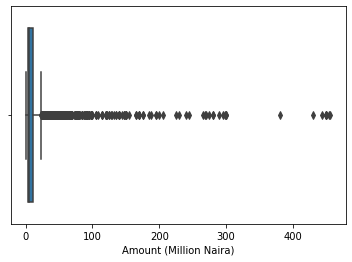

In [31]:
sns.boxplot(data = train, x = 'Amount (Million Naira)')

In [32]:
train.isna().sum()

VehicleID                 0
Maker                     0
Model                     0
Year                      0
Colour                    0
Distance                  0
Abuja                     0
Ibadan                    0
Lagos                     0
Brand New                 0
Foreign Used              0
Nigerian Used             0
Scaled_Distance           0
Log_Distance              0
box_cos_distance          0
Amount (Million Naira)    0
dtype: int64

TODO: Try standardizing the numeric columns in the  data and see whether the results will be better

In [33]:
X = train.drop(columns  = ['Amount (Million Naira)', 'VehicleID'])
y = train['Amount (Million Naira)']

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state = 0)

In [35]:
# from sklearn.metrics import mean_squared_error

# models_to_use = {
#     'linreg': LinearRegression(),
#     'ridge': Ridge(),
#     'lasso': Lasso(),
#     'gbdt': HistGradientBoostingRegressor(random_state =  0),
# }


# rmse = lambda x: mean_squared_error(y_valid, x, squared=False)

# for name, est in models_to_use.items():
#     print(f'Training With {name} model')
#     est.fit(X_train, y_train)
#     preds = est.predict(X_valid)
#     print('Root Mean Squared Error:', rmse(preds))
#     print('Cross-Validation RMSE:\n')
#     cv_rmse = cross_val_score(est,X,y,cv=10,scoring='neg_root_mean_squared_error').mean()
#     print(cv_rmse)
    
#     print('\n\n')

In [36]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [37]:
test.head()

,VehicleID,Maker,Model,Year,Colour,Distance,Abuja,Ibadan,Lagos,Brand New,Foreign Used,Nigerian Used,Scaled_Distance,Log_Distance,box_cos_distance
7205,VHL18518,3,27,2008,22,121487.418146,1,0,0,0,1,0,0.221673,11.707566,0.486007
7206,VHL17149,53,317,2013,22,90549.533163,0,0,1,0,1,0,-0.119866,11.413652,0.063543
7207,VHL10927,53,674,2005,8,159236.511848,0,0,1,0,1,0,0.638404,11.978146,0.919804
7208,VHL12909,53,317,2011,9,94903.339506,0,0,1,0,1,0,-0.071802,11.460614,0.127860
7209,VHL12348,29,484,2013,17,90549.533163,0,0,1,0,1,0,-0.119866,11.413652,0.063543


In [38]:
test.shape

(2061, 15)

In [39]:
from sklearn.metrics import mean_squared_error
gbdt = HistGradientBoostingRegressor(random_state=0)
gbdt.fit(X_train, y_train)
gbdt_preds = gbdt.predict(X_valid)
rmse = lambda x: mean_squared_error(y_valid, x, squared=False)
rmse(gbdt_preds)

12.140586376498051

In [40]:
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
rfpreds = rf.predict(X_valid)
rmse(rfpreds)

12.102897677032317

In [41]:
important_features = dict(zip(train.columns[1:],rf.feature_importances_))

In [42]:
important_features

{'Maker': 0.20354972503069008,
 'Model': 0.23854182602200383,
 'Year': 0.36718078709367175,
 'Colour': 0.04395159578053634,
 'Distance': 0.01637803958992258,
 'Abuja': 0.0033708850731703206,
 'Ibadan': 5.210862109055456e-05,
 'Lagos': 0.003255729269802197,
 'Brand New': 0.05927255887292774,
 'Foreign Used': 0.00857713660214631,
 'Nigerian Used': 0.0019308164818617485,
 'Scaled_Distance': 0.018508837616361306,
 'Log_Distance': 0.018707869481228122,
 'box_cos_distance': 0.016722084464587082}

In [43]:
train.shape

(7205, 16)

In [44]:
def save(model, filename):
    X_test = test.drop(columns=['VehicleID'])
    
    test_set_predictions = model.predict(X_test)
    sub_file = sample_sub.copy()
    sub_file['Amount (Million Naira)'] = test_set_predictions
    print(test_set_predictions[:10])
    sub_file.to_csv(filename, index=False)

In [45]:
train.to_csv('cleaned_train.csv', index = False)
test.to_csv('cleaned_test.csv', index = False)

In [ ]:
train.head

## Handling the outliers in The data

In [ ]:
save(rf,'rf_with_transform.csv')